# Problem Set 3: Portfolios

## Problem 2: Binary Loan Portfolios with Analytically Specified Priors




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy.stats import beta, binom, norm
# setting options
sns.set() # set style of graphs

In [2]:
from LoanSimulator import LoanSimulator
from FinTech_Data_Course_util_PS3 import plot_empirical_PD

Before running any of the remaining code, you should open the file LoanSimulator.py and read it in detail. In that file we define a class, a type of object in Python. Pay attention to the different requirements that the class has, so that you can suitably modify the code to solve the other exercises. In particular, notice what the attributes are as well as how we should pass the parameters to the class in a dictionary.

# Beta


In [86]:
# First, we need to create an instance of LoanSimulator class.
sim = LoanSimulator()

# Next, we define the corresponding parameters and we define a dictionary.
method = 'beta'
a = 2
b = 8
dist = beta(a, b)
params = {'method': 'beta', 'prior_dist': dist}

In [87]:
# Finally, we can assign the parameters to the simulation object
# we just created.
sim.set_attributes(params)

Now we are ready to do some simulations. In the next code chunk, we will fix the size of the portfolio ($n$) and the number of times we will simulate each loan in the portfolio ($m$). This last number is sometimes referred to as the number of Monte Carlo paths or iterations.

In [88]:
portfolio_size = 100
mc_paths = 1_000
borrower_probs = sim.borrower_probs(portfolio_size)
results = sim.run(portfolio_size,mc_paths, sim_prob = borrower_probs)

Now we are ready to do some plottings. We are interested here in two different plots. 

In the first one, we focus on the profile of the different borrowers in our loan portfolio. In particular, we are interested in classifying loans by their risk of defaulting, i.e. the value for $p$. Since in our example the prior distribution is Beta, we expect to see a similar profile to the pdf of this distribution (this pdf is plotted in the next code chunk for comparison).

In the second plot, we focus on the eventual outcomes of our portfolio. In particular, we are plotting a histogram of the percentage of loans that ended up defaulting. As you can see, the effect of the Central Limit Theorem quickly shows up.

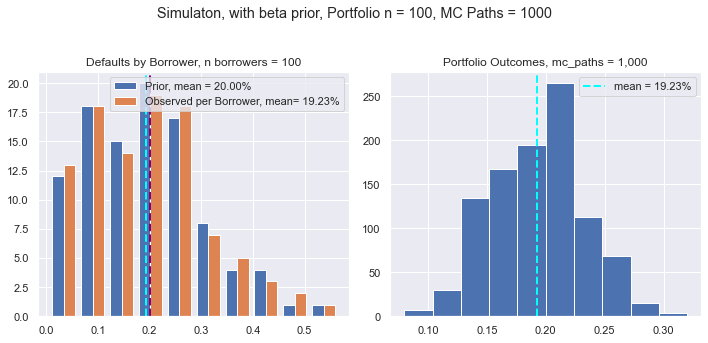

In [89]:
emp_portf_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
emp_borrower_default = np.mean(results, axis=1) #

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 5))
title = "Simulaton, with {} prior, Portfolio n = {}, MC Paths = {}".format(method, portfolio_size, mc_paths)
fig.suptitle(title)
label_borrower_probs = 'Prior, mean = {:0.02%}'.format(dist.mean())
label_emp_default = 'Observed per Borrower, mean= {:0.02%}'.format(emp_borrower_default.mean())
ax1.hist([borrower_probs, emp_borrower_default],  label=[label_borrower_probs,label_emp_default  ])
ax1.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2 )
ax1.axvline(x= dist.mean(), color='purple', linestyle='--', lw=2 )
#plt.hist(emp_borrower_default)

ax1.legend()
ax1.set_title("Defaults by Borrower, n borrowers = {:,}".format(portfolio_size))


ax2.hist( emp_portf_default)
ax2.set_title("Portfolio Outcomes, mc_paths = {:,}".format(mc_paths))
ax2.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2, label = "mean = {:0.02%}".format(emp_portf_default.mean()))
ax2.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

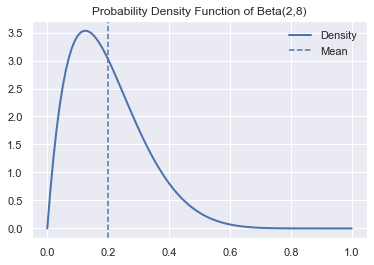

In [90]:
# Visualize distribution and mean of prior
prior_p = dist.mean()

x = np.linspace(0, 1, 100)
plt.plot(x, dist.pdf(x), lw=2, label='Density')
plt.axvline(x=dist.mean(), linestyle='--', label='Mean')
plt.legend(frameon=False)
plt.title("Probability Density Function of Beta({},{})".format(a,b))
plt.show()

Finally, we are ready to run several simulations with different portfolio sizes 
and compare how the convergence looks like in each scenario.

In [91]:
# Run simulation for multiple portfolio sizes
portfolio_size = [10, 100, 1_000, 10_000]
mc_paths = 1_000 # number of times each portfolio is simulated
portf_prob_default = np.empty( (mc_paths, len(portfolio_size)) ) # pre-allocate memory for probability of default results

for i, n in enumerate(portfolio_size):
      results = sim.run(n, mc_paths)
      portf_prob_default[:, i] = np.mean(results, axis=0) # average default probability of each portfolio scenario

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.2,0.196000,-0.008059,0.00000,0.408059,0.4000,0.208059,0.204000
1,100,0.2,0.191260,0.134206,0.13000,0.265794,0.2600,0.065794,0.068740
2,1000,0.2,0.204450,0.179194,0.18595,0.220806,0.2250,0.020806,0.020550
3,10000,0.2,0.198614,0.193421,0.19210,0.206579,0.2044,0.006579,0.005786


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

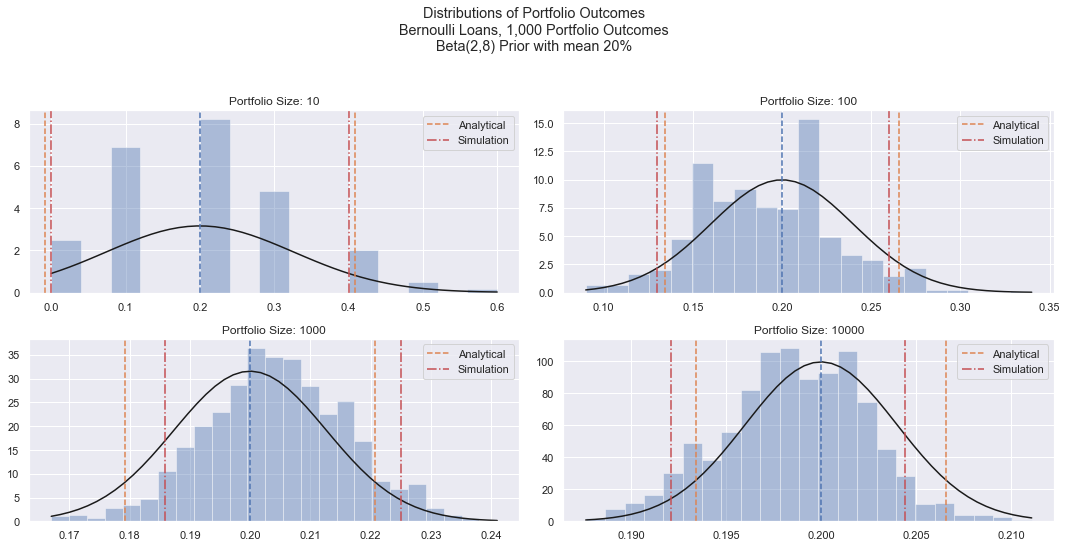

In [92]:
# Visualize and summarize results
method_desc = 'Beta({},{}) Prior with mean {:.0%}'.format(a,b,dist.mean())
sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.20269,0.179194,0.18,0.220806,0.2211,0.020806,0.01841


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


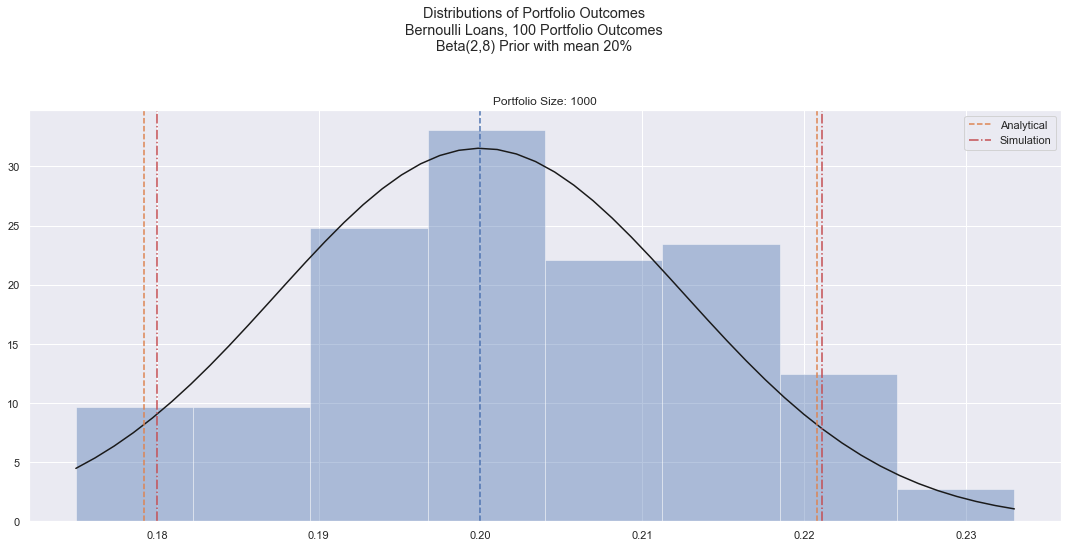

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.198691,0.179194,0.179,0.220806,0.218,0.020806,0.019309


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


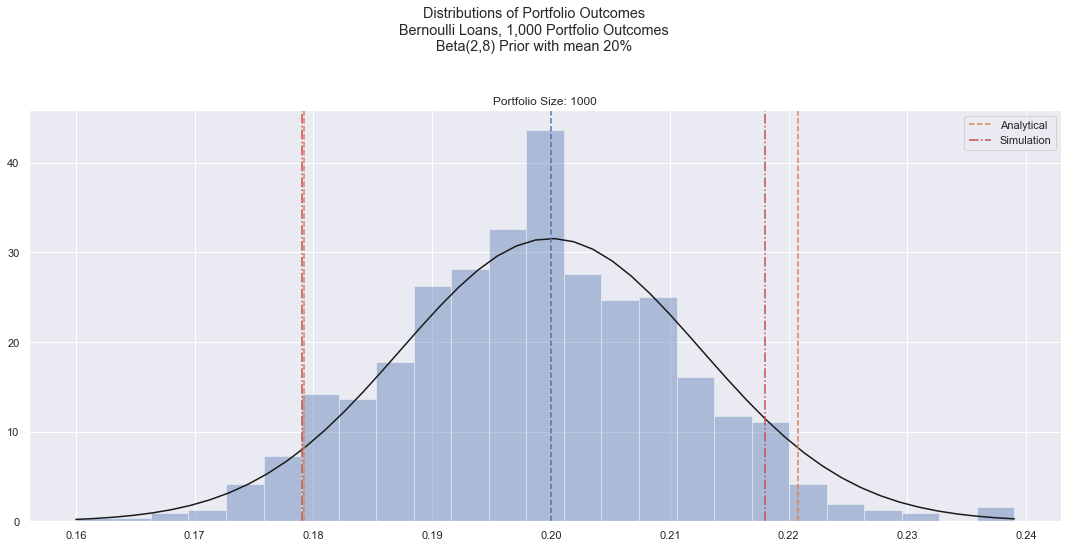

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.204054,0.179194,0.184,0.220806,0.224,0.020806,0.019946


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


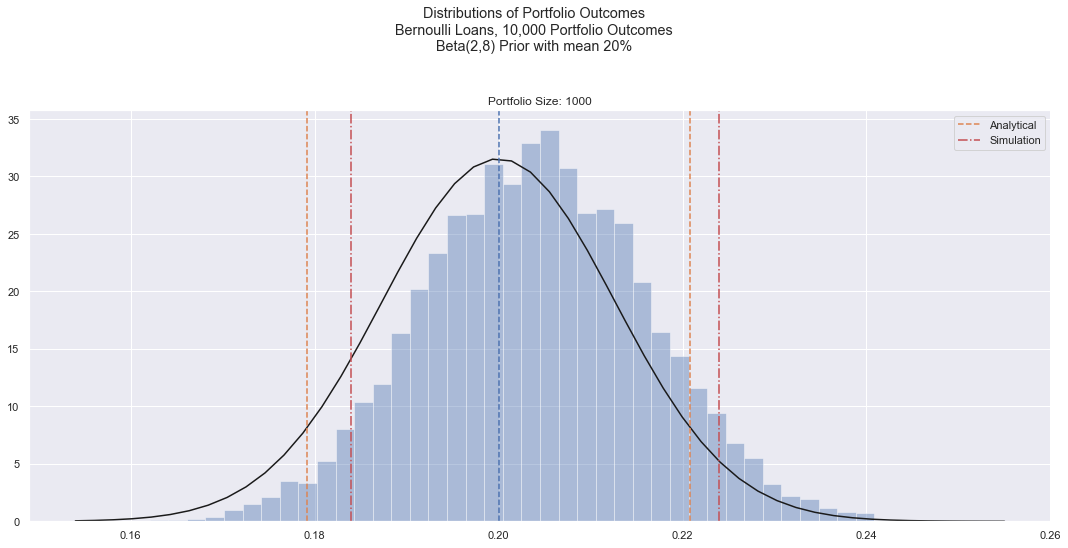

In [10]:
# Run simulation for multiple MC paths.
portfolio_size = 1_000
mc_paths = [100, 1_000, 10_000]

for m in mc_paths:
  portf_prob_default = np.empty(m) # pre-allocate memory for probability of default results
  results = sim.run(portfolio_size, m)
  portf_prob_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
  # Visualize and summarize results
  method_desc = 'Beta({},{}) Prior with mean {:.0%}'.format(a,b,dist.mean())
  sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

# Fixed

In [11]:
# First, we need to create an instance of LoanSimulator class.
sim = LoanSimulator()

## Example for the Bernoulli distribution with p = 0.5
method = 'bernoulli'
p = 0.2
dist = binom(1, p)
params = {'method': 'bernoulli', 'prior_dist': dist}

In [79]:
# Finally, we can assign the parameters to the simulation object
# we just created.
sim.set_attributes(params)

In [80]:
portfolio_size = 100
mc_paths = 1_000
borrower_probs = sim.borrower_probs(portfolio_size)
results = sim.run(portfolio_size,mc_paths, sim_prob = borrower_probs)

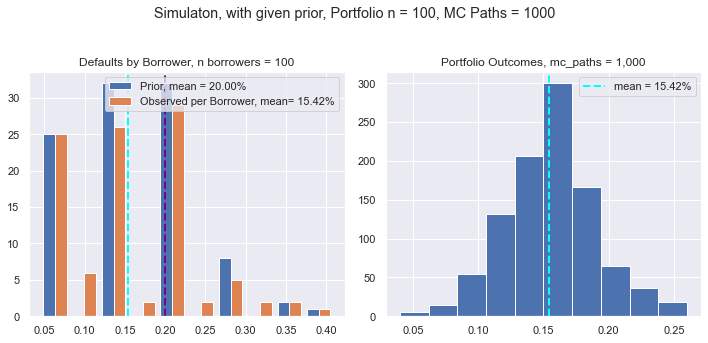

In [81]:
emp_portf_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
emp_borrower_default = np.mean(results, axis=1) #

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 5))
title = "Simulaton, with {} prior, Portfolio n = {}, MC Paths = {}".format(method, portfolio_size, mc_paths)
fig.suptitle(title)
label_borrower_probs = 'Prior, mean = {:0.02%}'.format(dist.mean())
label_emp_default = 'Observed per Borrower, mean= {:0.02%}'.format(emp_borrower_default.mean())
ax1.hist([borrower_probs, emp_borrower_default],  label=[label_borrower_probs,label_emp_default  ])
ax1.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2 )
ax1.axvline(x= dist.mean(), color='purple', linestyle='--', lw=2 )
#plt.hist(emp_borrower_default)

ax1.legend()
ax1.set_title("Defaults by Borrower, n borrowers = {:,}".format(portfolio_size))


ax2.hist( emp_portf_default)
ax2.set_title("Portfolio Outcomes, mc_paths = {:,}".format(mc_paths))
ax2.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2, label = "mean = {:0.02%}".format(emp_portf_default.mean()))
ax2.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

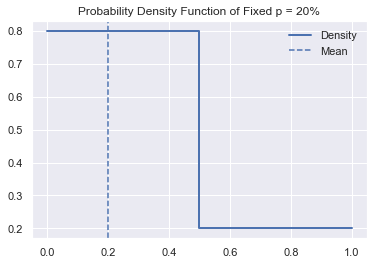

In [82]:
# Visualize distribution and mean of prior
prior_p = dist.mean()

x = [0, 1]
p = 0.2
dist = binom(1, p)

plt.step(x, dist.pmf(x), lw=2, label='Density', where = "mid")
plt.axvline(x=dist.mean(), label='Mean', linestyle='--')
plt.legend(frameon=False)
plt.title("Probability Density Function of Fixed p = 20%".format())
plt.show()

In [83]:
# Run simulation for multiple portfolio sizes
portfolio_size = [10, 100, 1_000, 10_000]
mc_paths = 1_000 # number of times each portfolio is simulated
portf_prob_default = np.empty( (mc_paths, len(portfolio_size)) ) # pre-allocate memory for probability of default results

for i, n in enumerate(portfolio_size):
      results = sim.run(n, mc_paths)
      portf_prob_default[:, i] = np.mean(results, axis=0) # average default probability of each portfolio scenario

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.2,0.160500,-0.008059,0.0000,0.408059,0.4000,0.208059,0.239500
1,100,0.2,0.158380,0.134206,0.1000,0.265794,0.2200,0.065794,0.061620
2,1000,0.2,0.153588,0.179194,0.1370,0.220806,0.1720,0.020806,0.018412
3,10000,0.2,0.153595,0.193421,0.1478,0.206579,0.1594,0.006579,0.005805


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

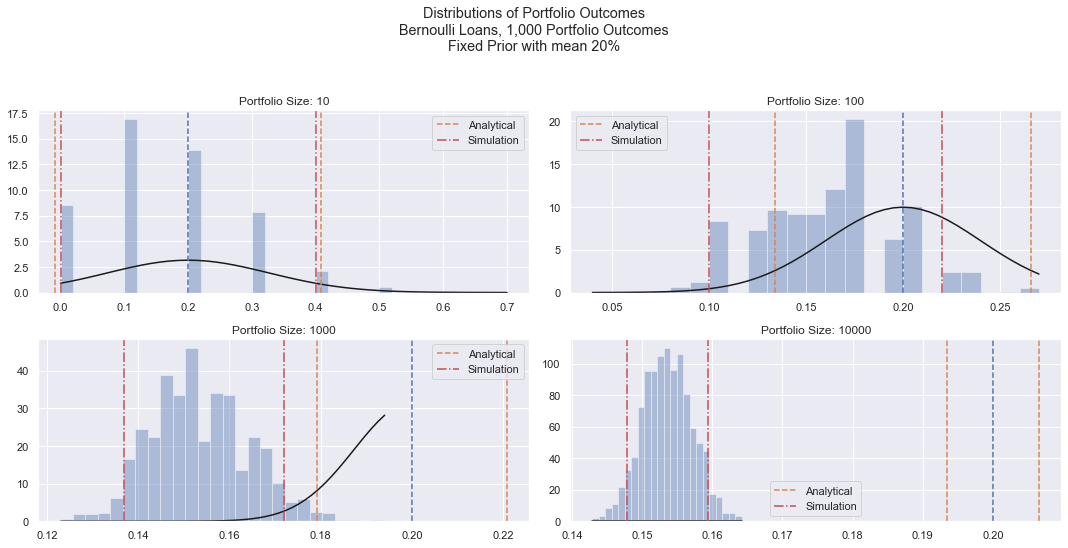

In [85]:
# Visualize and summarize results
method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.20087,0.179194,0.18195,0.220806,0.2201,0.020806,0.01923


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


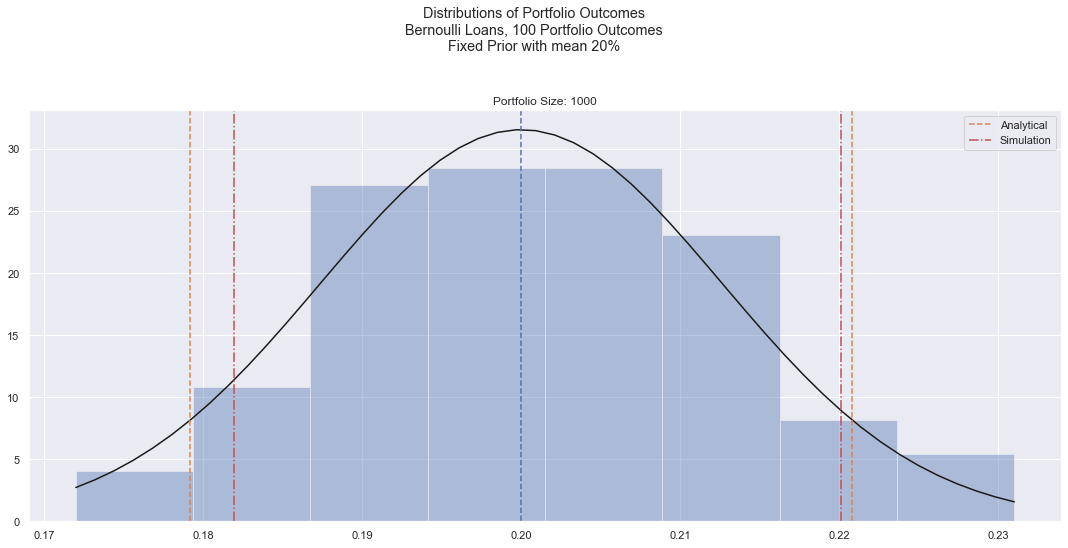

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.199532,0.179194,0.178,0.220806,0.22,0.020806,0.020468


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


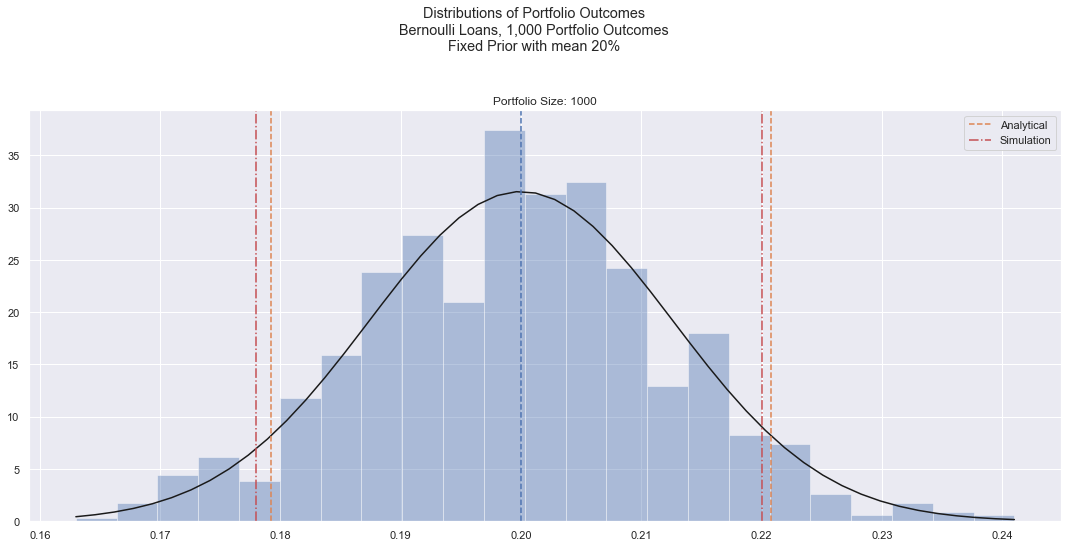

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.20017,0.179194,0.179,0.220806,0.221,0.020806,0.02083


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


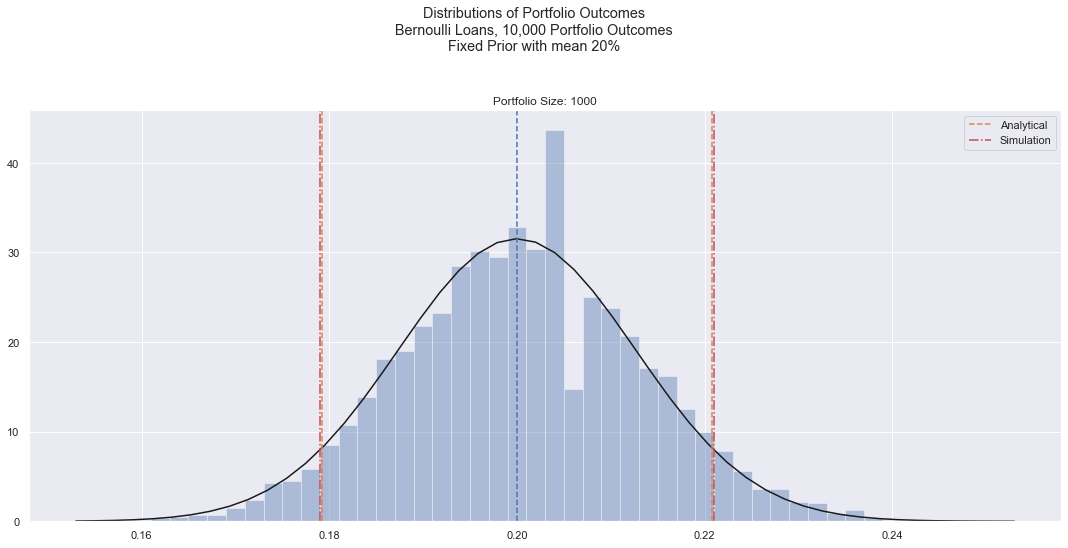

In [22]:
# Run simulation for multiple MC paths.
portfolio_size = 1_000
mc_paths = [100, 1_000, 10_000]

for m in mc_paths:
  portf_prob_default = np.empty(m) # pre-allocate memory for probability of default results
  results = sim.run(portfolio_size, m)
  portf_prob_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
  # Visualize and summarize results
  method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
  sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

# Discrete "Symmetric"

In [93]:
# First, we need to create an instance of LoanSimulator class.
sim = LoanSimulator()

method = 'given'

# For the method 'given', one needs to define first a vector 
# with the default probabilities.

default_prob = [0.1, 0.3]

# And then pass a second vector with the weights for each of the default
# probabilities in the prior distribution.

sample_prob = [0.5, 0.5]

# Sometimes the weights will not sum up to 1. Python is always expecting
# the weights to sum up to 1, so you may need to normalize them.

sample_prob = sample_prob / np.sum(sample_prob)

params = {'method': 'given', 'prior_prob': default_prob, 
            'sample_prob': sample_prob}


In [94]:
# Finally, we can assign the parameters to the simulation object
# we just created.
sim.set_attributes(params)

In [95]:
portfolio_size = 100
mc_paths = 1_000
borrower_probs = sim.borrower_probs(portfolio_size)
results = sim.run(portfolio_size,mc_paths, sim_prob = borrower_probs)

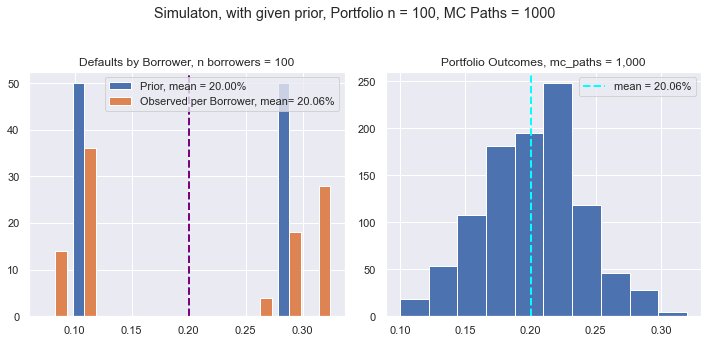

In [96]:
emp_portf_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
emp_borrower_default = np.mean(results, axis=1) #

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 5))
title = "Simulaton, with {} prior, Portfolio n = {}, MC Paths = {}".format(method, portfolio_size, mc_paths)
fig.suptitle(title)
label_borrower_probs = 'Prior, mean = {:0.02%}'.format(dist.mean())
label_emp_default = 'Observed per Borrower, mean= {:0.02%}'.format(emp_borrower_default.mean())
ax1.hist([borrower_probs, emp_borrower_default],  label=[label_borrower_probs,label_emp_default  ])
ax1.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2 )
ax1.axvline(x= dist.mean(), color='purple', linestyle='--', lw=2 )
# plt.hist(emp_borrower_default)

ax1.legend()
ax1.set_title("Defaults by Borrower, n borrowers = {:,}".format(portfolio_size))


ax2.hist( emp_portf_default)
ax2.set_title("Portfolio Outcomes, mc_paths = {:,}".format(mc_paths))
ax2.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2, label = "mean = {:0.02%}".format(emp_portf_default.mean()))
ax2.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

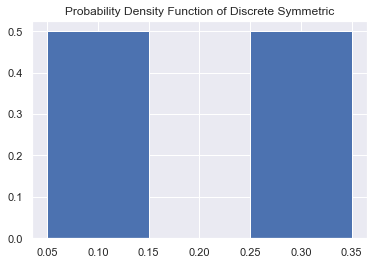

In [97]:
# Visualize distribution and mean of prior
prior_p = dist.mean()

x = np.linspace(0, 1, 100)
plt.bar(default_prob, sample_prob, width = 0.1)
#plt.axvline(x=dist.mean(), linestyle='--', label='Mean')
#plt.legend(frameon=False)
plt.title("Probability Density Function of Discrete Symmetric".format())
plt.show()

In [98]:
# Run simulation for multiple portfolio sizes
portfolio_size = [10, 100, 1_000, 10_000]
mc_paths = 1_000 # number of times each portfolio is simulated
portf_prob_default = np.empty( (mc_paths, len(portfolio_size)) ) # pre-allocate memory for probability of default results

for i, n in enumerate(portfolio_size):
      results = sim.run(n, mc_paths)
      portf_prob_default[:, i] = np.mean(results, axis=0) # average default probability of each portfolio scenario

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.2,0.157600,-0.008059,0.000,0.408059,0.400000,0.208059,0.242400
1,100,0.2,0.197020,0.134206,0.140,0.265794,0.260000,0.065794,0.062980
2,1000,0.2,0.194356,0.179194,0.175,0.220806,0.214000,0.020806,0.019644
3,10000,0.2,0.199005,0.193421,0.193,0.206579,0.205005,0.006579,0.006000


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

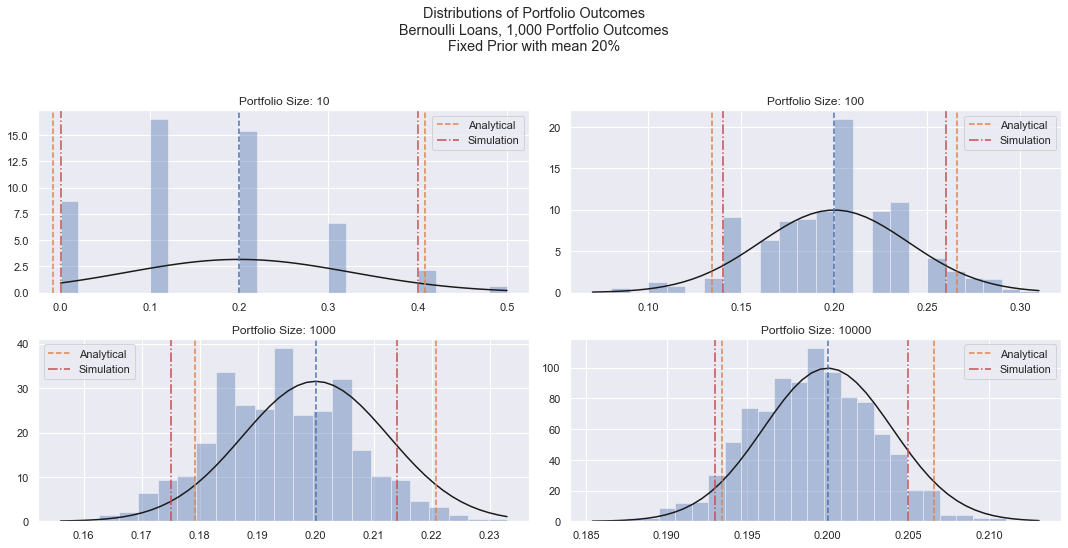

In [99]:
# Visualize and summarize results
method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.20037,0.179194,0.18195,0.220806,0.22005,0.020806,0.01968


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


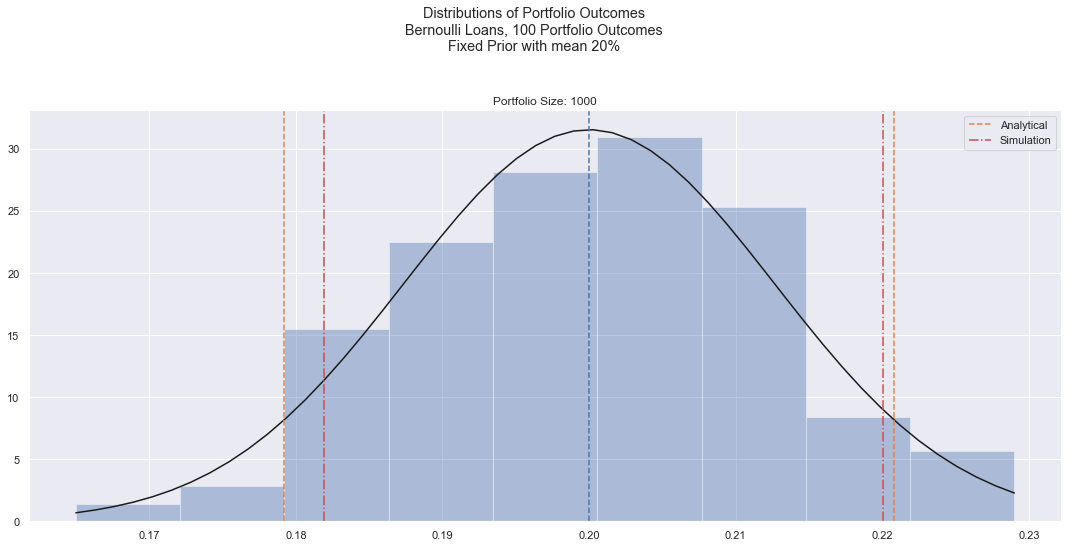

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.199809,0.179194,0.17895,0.220806,0.22,0.020806,0.020191


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


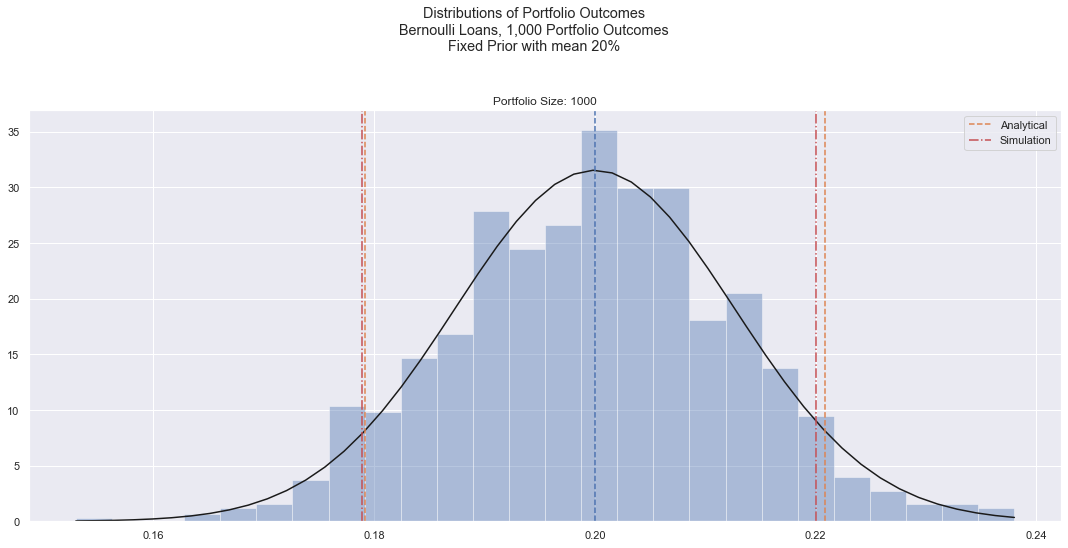

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.205593,0.179194,0.185,0.220806,0.226,0.020806,0.020407


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


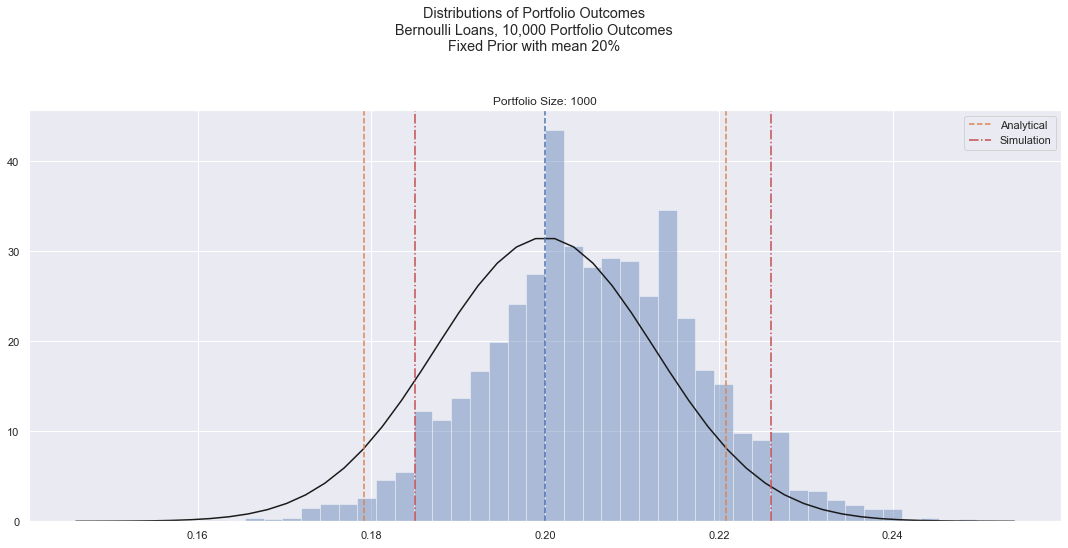

In [28]:
# Run simulation for multiple MC paths.
portfolio_size = 1_000
mc_paths = [100, 1_000, 10_000]

for m in mc_paths:
  portf_prob_default = np.empty(m) # pre-allocate memory for probability of default results
  results = sim.run(portfolio_size, m)
  portf_prob_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
  # Visualize and summarize results
  method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
  sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

# Discrete "Asymmetric"

In [100]:
# First, we need to create an instance of LoanSimulator class.
sim = LoanSimulator()

method = 'given'

# For the method 'given', one needs to define first a vector 
# with the default probabilities.

default_prob = [0.15, 0.4]

# And then pass a second vector with the weights for each of the default
# probabilities in the prior distribution.

sample_prob = [0.8, 0.2]

# Sometimes the weights will not sum up to 1. Python is always expecting
# the weights to sum up to 1, so you may need to normalize them.

sample_prob = sample_prob / np.sum(sample_prob)

params = {'method': 'given', 'prior_prob': default_prob, 
            'sample_prob': sample_prob}


In [101]:
# Finally, we can assign the parameters to the simulation object
# we just created.
sim.set_attributes(params)

In [102]:
portfolio_size = 100
mc_paths = 1_000
borrower_probs = sim.borrower_probs(portfolio_size)
results = sim.run(portfolio_size,mc_paths, sim_prob = borrower_probs)

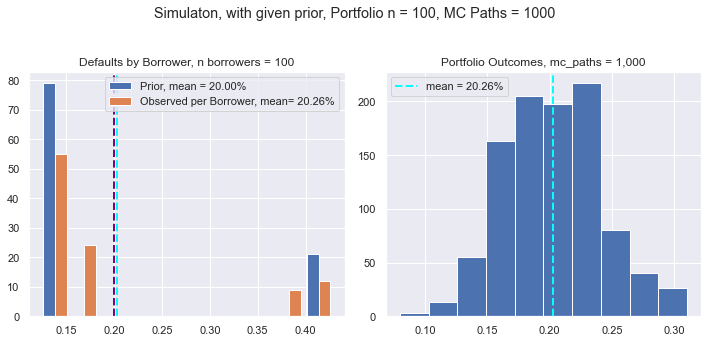

In [103]:
emp_portf_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
emp_borrower_default = np.mean(results, axis=1) #

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 5))
title = "Simulaton, with {} prior, Portfolio n = {}, MC Paths = {}".format(method, portfolio_size, mc_paths)
fig.suptitle(title)
label_borrower_probs = 'Prior, mean = {:0.02%}'.format(dist.mean())
label_emp_default = 'Observed per Borrower, mean= {:0.02%}'.format(emp_borrower_default.mean())
ax1.hist([borrower_probs, emp_borrower_default],  label=[label_borrower_probs,label_emp_default  ])
ax1.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2 )
ax1.axvline(x= dist.mean(), color='purple', linestyle='--', lw=2 )
# plt.hist(emp_borrower_default)

ax1.legend()
ax1.set_title("Defaults by Borrower, n borrowers = {:,}".format(portfolio_size))


ax2.hist( emp_portf_default)
ax2.set_title("Portfolio Outcomes, mc_paths = {:,}".format(mc_paths))
ax2.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2, label = "mean = {:0.02%}".format(emp_portf_default.mean()))
ax2.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

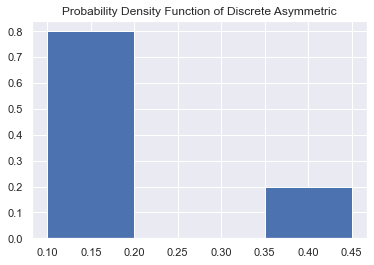

In [104]:
# Visualize distribution and mean of prior
prior_p = dist.mean()

x = np.linspace(0, 1, 100)
plt.bar(default_prob, sample_prob, width = 0.1)
#plt.axvline(x=dist.mean(), linestyle='--', label='Mean')
#plt.legend(frameon=False)
plt.title("Probability Density Function of Discrete Asymmetric".format())
plt.show()

In [105]:
# Run simulation for multiple portfolio sizes
portfolio_size = [10, 100, 1_000, 10_000]
mc_paths = 1_000 # number of times each portfolio is simulated
portf_prob_default = np.empty( (mc_paths, len(portfolio_size)) ) # pre-allocate memory for probability of default results

for i, n in enumerate(portfolio_size):
      results = sim.run(n, mc_paths)
      portf_prob_default[:, i] = np.mean(results, axis=0) # average default probability of each portfolio scenario

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.2,0.216600,-0.008059,0.0000,0.408059,0.400000,0.208059,0.183400
1,100,0.2,0.197390,0.134206,0.1400,0.265794,0.260000,0.065794,0.062610
2,1000,0.2,0.200728,0.179194,0.1810,0.220806,0.221000,0.020806,0.020272
3,10000,0.2,0.200527,0.193421,0.1939,0.206579,0.206805,0.006579,0.006278


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

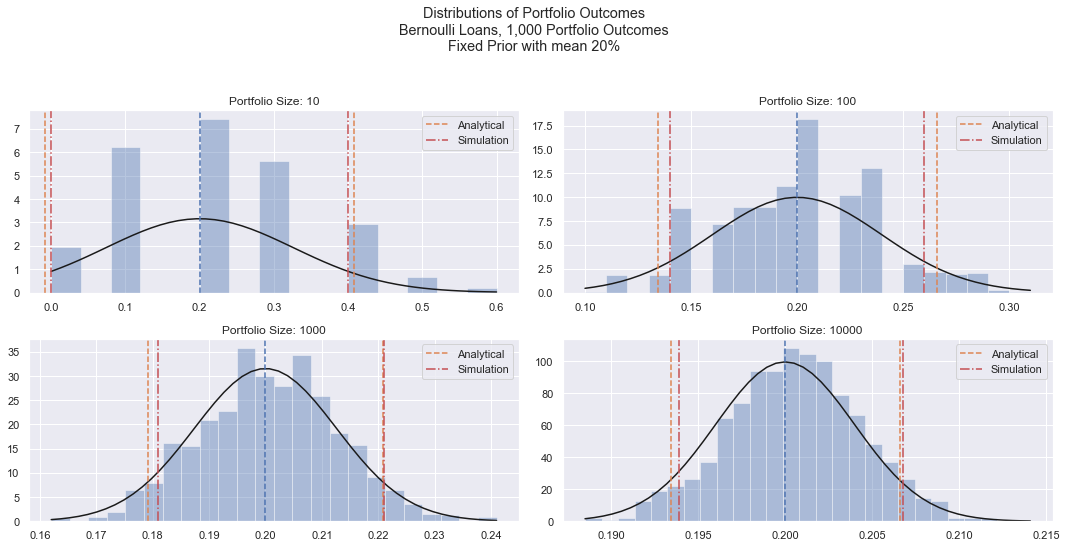

In [106]:
# Visualize and summarize results
method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.2033,0.179194,0.18895,0.220806,0.22405,0.020806,0.02075


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


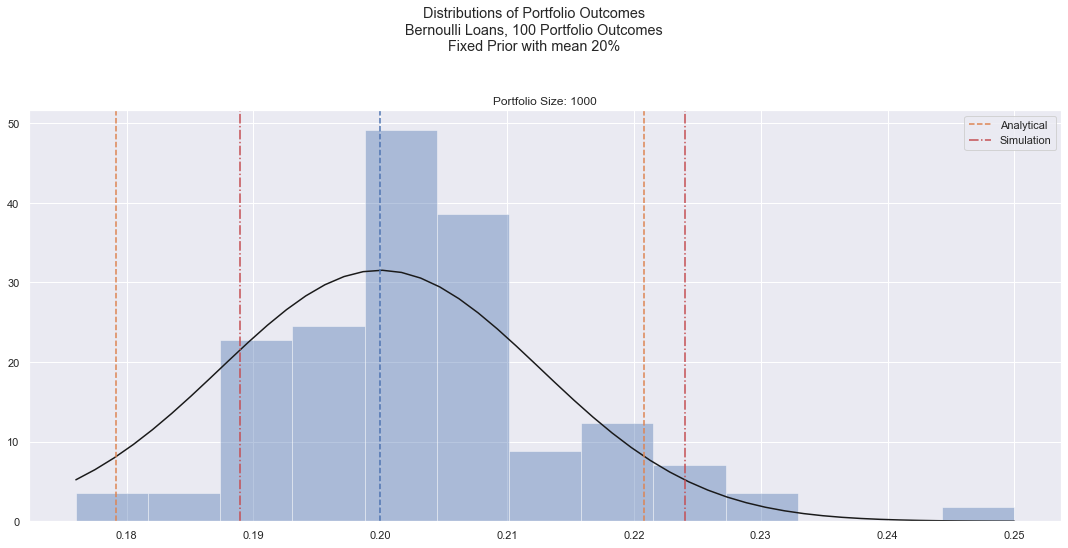

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.202937,0.179194,0.183,0.220806,0.224,0.020806,0.021063


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


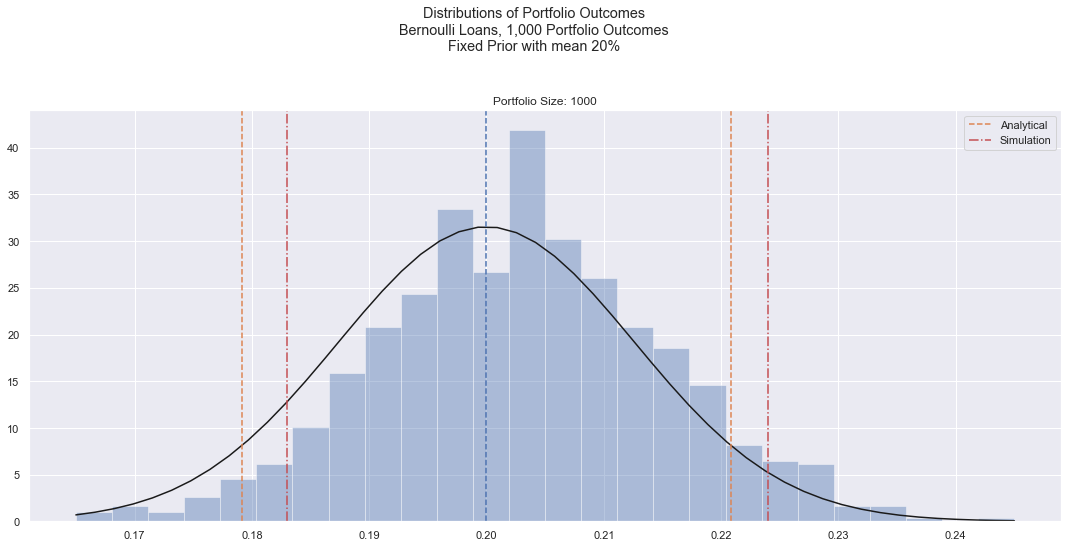

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.198944,0.179194,0.179,0.220806,0.219,0.020806,0.020056


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


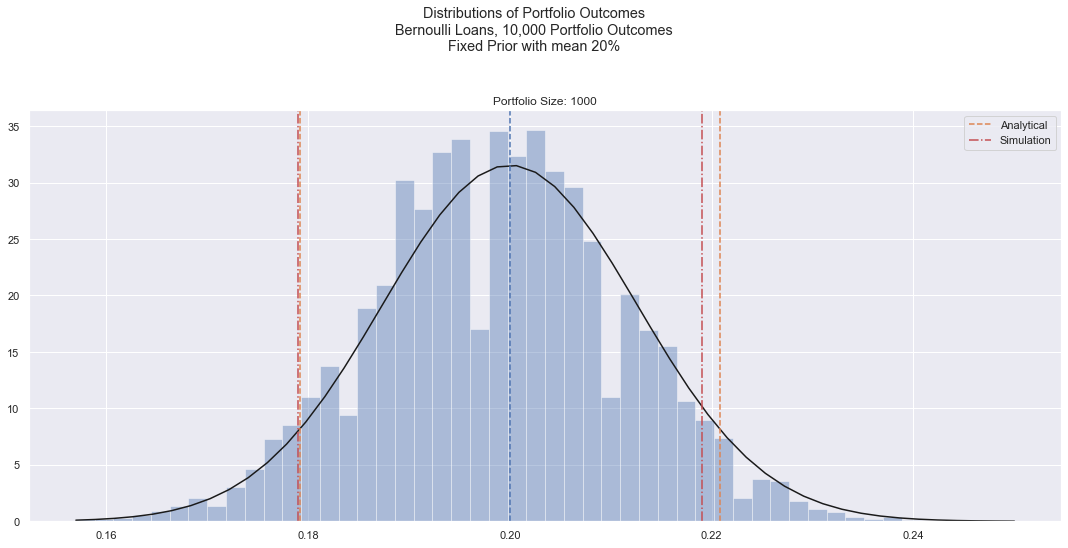

In [36]:
# Run simulation for multiple MC paths.
portfolio_size = 1_000
mc_paths = [100, 1_000, 10_000]

for m in mc_paths:
  portf_prob_default = np.empty(m) # pre-allocate memory for probability of default results
  results = sim.run(portfolio_size, m)
  portf_prob_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
  # Visualize and summarize results
  method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
  sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

## Problem 3: Lending Club and Empirically Derived Priors

In [108]:
# Read in the LendingClub data file
# Change the path to the data file as needed

path = 'data/'

file = 'LendingClub_2016Q1.csv' # cleaned data

# Read in the LendingClub data provided into a pandas dataframe
lc_data = pd.read_csv(path+file, skiprows=0)

lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96120 entries, 0 to 96119
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         96120 non-null  float64
 1   int_rate          96120 non-null  float64
 2   installment       96120 non-null  float64
 3   grade             96120 non-null  object 
 4   sub_grade         96120 non-null  object 
 5   emp_length        88772 non-null  float64
 6   annual_inc        96120 non-null  float64
 7   dti               96110 non-null  float64
 8   delinq_2yrs       96120 non-null  float64
 9   earliest_cr_line  96120 non-null  int64  
 10  revol_util        96060 non-null  float64
 11  total_pymnt       96120 non-null  float64
 12  total_rec_prncp   96120 non-null  float64
 13  default           96120 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 10.3+ MB


In the next code chunk looks at the percentage of loans within each grade as well as their probability of default. With this data, use the method 'given' to perform the corresponding simulations.

In [109]:
summ_by_group = lc_data.groupby(['grade']).mean()
attributes = ['percentage','default']
total = lc_data.shape[0]
summ_by_group['percentage'] = lc_data.groupby(['grade']).count().iloc[:,0]/total
values = summ_by_group[attributes]

In [122]:
print(values.default)
print(values.percentage)

grade
A    0.054038
B    0.125360
C    0.206253
D    0.284279
E    0.362233
F    0.396104
G    0.454545
Name: default, dtype: float64
grade
A    0.257022
B    0.343082
C    0.253215
D    0.099397
E    0.035040
F    0.009613
G    0.002632
Name: percentage, dtype: float64


In [110]:
# First, we need to create an instance of LoanSimulator class.
sim = LoanSimulator()

method = 'given'

# For the method 'given', one needs to define first a vector 
# with the default probabilities.

default_prob = values.default

# And then pass a second vector with the weights for each of the default
# probabilities in the prior distribution.

sample_prob = values.percentage

# Sometimes the weights will not sum up to 1. Python is always expecting
# the weights to sum up to 1, so you may need to normalize them.

sample_prob = sample_prob / np.sum(sample_prob)

params = {'method': 'given', 'prior_prob': default_prob, 
            'sample_prob': sample_prob}


In [111]:
# Finally, we can assign the parameters to the simulation object
# we just created.
sim.set_attributes(params)

In [112]:
portfolio_size = 100
mc_paths = 1_000
borrower_probs = sim.borrower_probs(portfolio_size)
results = sim.run(portfolio_size,mc_paths, sim_prob = borrower_probs)

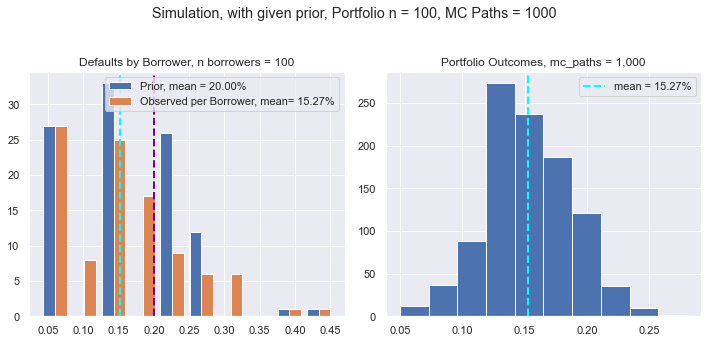

In [113]:
emp_portf_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
emp_borrower_default = np.mean(results, axis=1) #

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 5))
title = "Simulation, with {} prior, Portfolio n = {}, MC Paths = {}".format(method, portfolio_size, mc_paths)
fig.suptitle(title)
label_borrower_probs = 'Prior, mean = {:0.02%}'.format(dist.mean())
label_emp_default = 'Observed per Borrower, mean= {:0.02%}'.format(emp_borrower_default.mean())
ax1.hist([borrower_probs, emp_borrower_default],  label=[label_borrower_probs,label_emp_default  ])
ax1.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2 )
ax1.axvline(x= dist.mean(), color='purple', linestyle='--', lw=2 )
# plt.hist(emp_borrower_default)

ax1.legend()
ax1.set_title("Defaults by Borrower, n borrowers = {:,}".format(portfolio_size))


ax2.hist( emp_portf_default)
ax2.set_title("Portfolio Outcomes, mc_paths = {:,}".format(mc_paths))
ax2.axvline(x= emp_borrower_default.mean(), color='cyan', linestyle='--', lw=2, label = "mean = {:0.02%}".format(emp_portf_default.mean()))
ax2.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

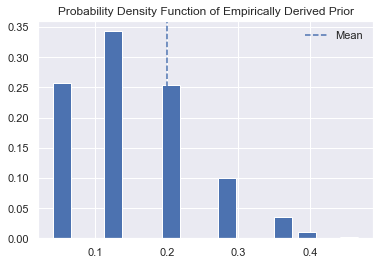

In [117]:
# Visualize distribution and mean of prior
prior_p = dist.mean()

x = np.linspace(0, 1, 100)
plt.bar(default_prob, sample_prob, width = 0.025)
plt.axvline(x=dist.mean(), linestyle='--', label='Mean')
plt.legend(frameon=False)
plt.title("Probability Density Function of Empirically Derived Prior".format())
plt.show()

In [124]:
print(dist.mean())
print(dist.var())

0.2
0.014545454545454545


In [46]:
# Run simulation for multiple portfolio sizes
portfolio_size = [10, 100, 1_000, 10_000]
mc_paths = 1_000 # number of times each portfolio is simulated
portf_prob_default = np.empty( (mc_paths, len(portfolio_size)) ) # pre-allocate memory for probability of default results

for i, n in enumerate(portfolio_size):
      results = sim.run(n, mc_paths)
      portf_prob_default[:, i] = np.mean(results, axis=0) # average default probability of each portfolio scenario

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.2,0.165800,-0.008059,0.000,0.408059,0.4000,0.208059,0.234200
1,100,0.2,0.148820,0.134206,0.090,0.265794,0.2100,0.065794,0.061180
2,1000,0.2,0.159650,0.179194,0.142,0.220806,0.1780,0.020806,0.018350
3,10000,0.2,0.155914,0.193421,0.150,0.206579,0.1618,0.006579,0.005886


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

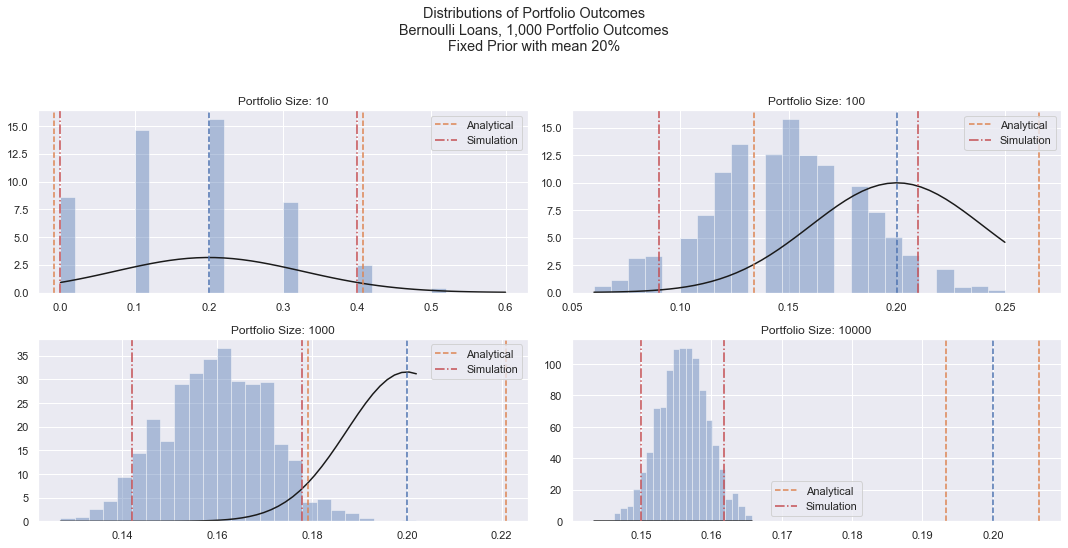

In [47]:
# Visualize and summarize results
method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.15575,0.179194,0.138,0.220806,0.174,0.020806,0.01825


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


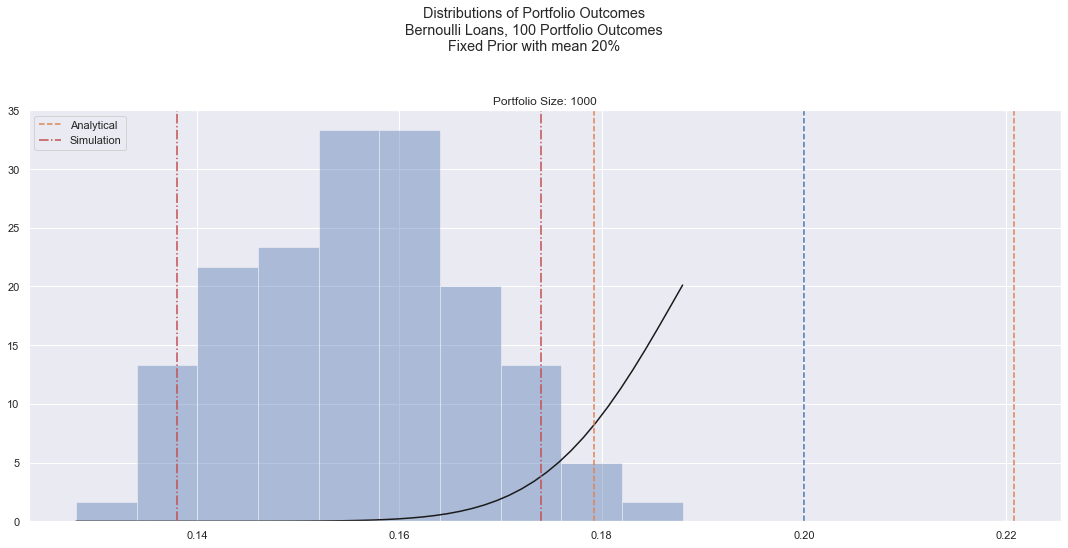

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.160847,0.179194,0.142,0.220806,0.18,0.020806,0.019153


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


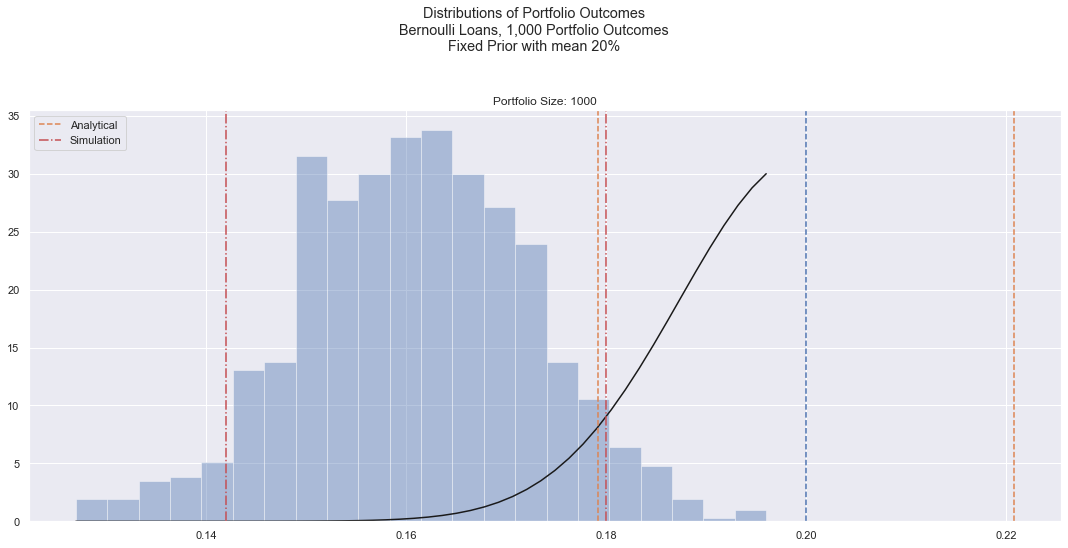

,Portfolio Sizes,p,Simulated Mean,Wald Int 5%-tile,Sim 5%-tile,Wald Int 95%-tile,Sim 95%-tile,Wald Risk 95%-tile,Sim Risk 95%-tile
0,1000,0.2,0.159049,0.179194,0.141,0.220806,0.177,0.020806,0.017951


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


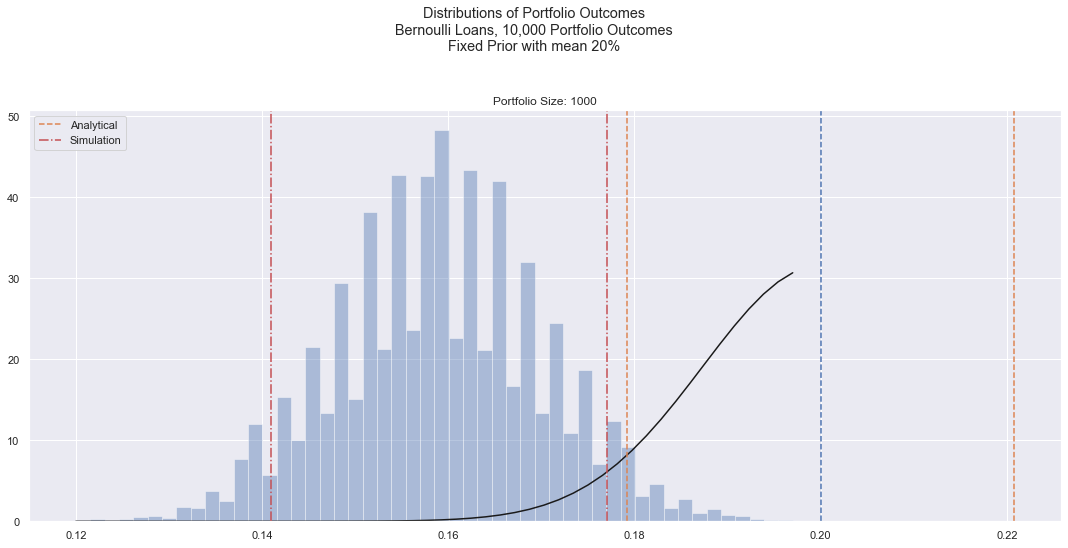

In [49]:
# Run simulation for multiple MC paths.
portfolio_size = 1_000
mc_paths = [100, 1_000, 10_000]

for m in mc_paths:
  portf_prob_default = np.empty(m) # pre-allocate memory for probability of default results
  results = sim.run(portfolio_size, m)
  portf_prob_default = np.mean(results, axis=0) # average default probability of each portfolio scenario
  # Visualize and summarize results
  method_desc = 'Fixed Prior with mean {:.0%}'.format(dist.mean())
  sum_stats = plot_empirical_PD(prior_p, portf_prob_default, sample_size=portfolio_size, label_text=method_desc)

## Problem 4: Sampling Loans


In this exercise, instead of simulation the behaviour of the loans from Lending Club, we will directly sample from our dataset to assess the probability of default.

### Question a):

In [50]:
# Set parameters of re-sampling
mc_rep = 1_000
portfolio_size = [10, 100, 1_000, 10_000]

n_g = len(lc_data)
p_g = np.mean(lc_data['default'])

# For each of the potfolio sizes, we are going to sample n loans 
# from the whole data set. Then, we will compute the default probability
# and compare with the previous sampling method.

boot_prop = np.empty( (mc_rep, len(portfolio_size)) )  # pre-allocate memory for storing bootstrapped means
for j, n in enumerate(portfolio_size):
    for i in range(mc_rep):
        # Apply the re-sample function
        data_s = resample(lc_data, n_samples=n, replace=True)
        boot_prop[i, j] = np.mean(data_s['default'])

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.155077,0.153500,-0.033205,0.0000,0.343359,0.4000,0.188282,0.246500
1,100,0.155077,0.156170,0.095537,0.1000,0.214617,0.2200,0.059540,0.063830
2,1000,0.155077,0.154661,0.136249,0.1350,0.173905,0.1740,0.018828,0.019339
3,10000,0.155077,0.155050,0.149123,0.1492,0.161031,0.1608,0.005954,0.005750


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

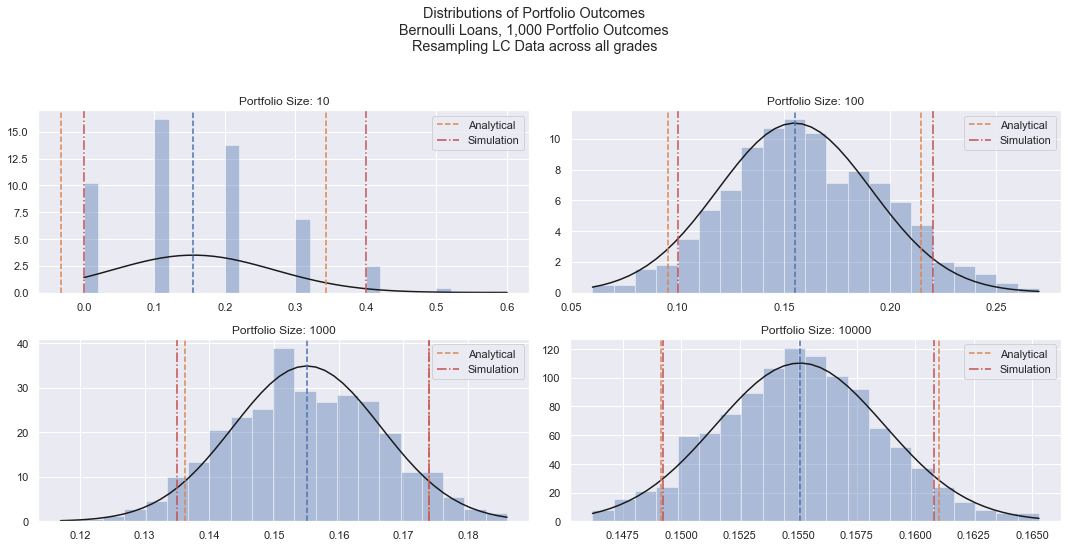

In [51]:
# Summarize and visualize results of bootstrapping
method_desc = f"Resampling LC Data across all grades"
sum_stats = plot_empirical_PD(pop_mean=p_g, emp_data=boot_prop, sample_size=portfolio_size, label_text=method_desc)

### Question b):

For the next exercise, we will only focus on the riskier loans, i.e. those with a lower grade. In particular, we will explore loans with grades "E", "F", and "G".

In [52]:
# We select the given grades for the problem.
select_grade = ["E","F","G"]

# Select the subset of loans that we are interested in studying.
data_bad = lc_data[lc_data['grade'].isin(select_grade)]

# Compute some basic statistics about our dataset.
n_bad = len(data_bad)
print(n_bad)
p_bad = np.mean(data_bad['default'])
print(p_bad)

4545
0.37425742574257426


Now it is your turn to repeat the same analysis from before and analyze the results.

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.374257,0.377600,0.122542,0.1000,0.625973,0.6000,0.251716,0.222400
1,100,0.374257,0.373710,0.294658,0.2900,0.453857,0.4505,0.079599,0.076790
2,1000,0.374257,0.374631,0.349086,0.3500,0.399429,0.3980,0.025172,0.023369
3,10000,0.374257,0.374344,0.366297,0.3662,0.382217,0.3821,0.007960,0.007756


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

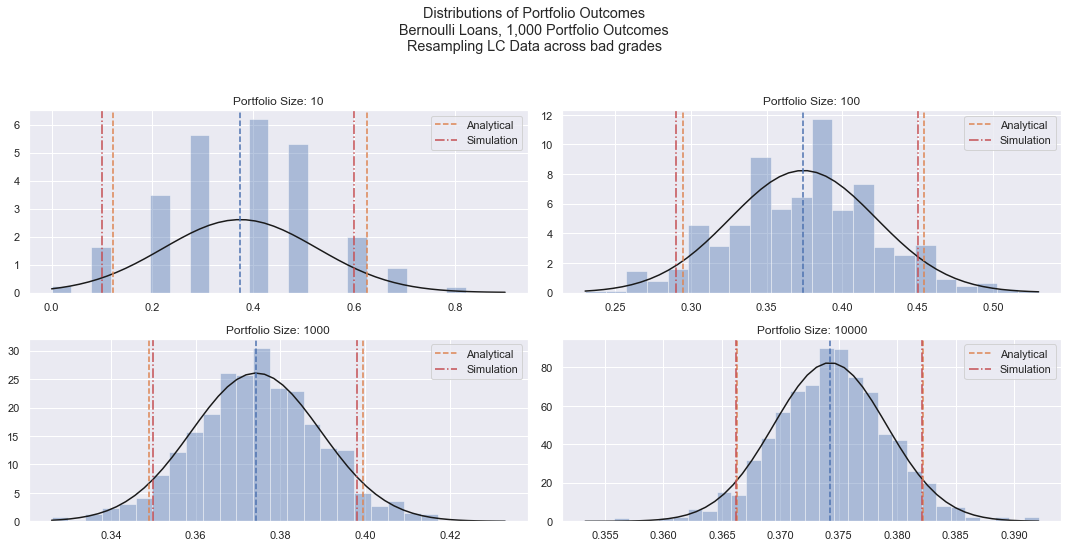

In [53]:
# Set parameters of re-sampling
mc_rep = 1_000
portfolio_size = [10, 100, 1_000, 10_000]

## You need to complete this part of the code.
boot_prop = np.empty( (mc_rep, len(portfolio_size)) )  # pre-allocate memory for storing bootstrapped means
for j, n in enumerate(portfolio_size):
    for i in range(mc_rep):
        # Apply the re-sample function
        data_s = resample(data_bad, n_samples=n, replace=True)
        boot_prop[i, j] = np.mean(data_s['default'])



# Summarize and visualize results of bootstrapping
method_desc = f"Resampling LC Data across bad grades"
sum_stats = plot_empirical_PD(pop_mean=p_bad, emp_data=boot_prop, sample_size=portfolio_size, label_text=method_desc)

### Question c):

Have you realized that there are only $4545$ loans in our pool of bad loans, but we were capable of constructing a porfolio with $10,000$ loans? This is because we were sampling **with replacement**. In this exercise, you will sample **without replacement**.

In [59]:
# Start by executing this piece of code. Python should complaing.
mc_rep = 1_000
portfolio_size = 10_000

data_s = resample(data_bad, n_samples= portfolio_size, replace=False)

# For what values of n and m can you run simulations based on 
# sampling without replacement?


# port size: 4545
# mc rep: 



# port: 0-4545
# mc: any number 

ValueError: Cannot sample 10000 out of arrays with dim 4545 when replace is False

Now, complete the rest of the assignment. Notice that when sampling in this question, you are always expected to sample **without replacement**.

In [56]:
mc_rep = 1_00
portfolio_size = 4545

data_s = resample(data_bad, n_samples= portfolio_size, replace=False)

In [57]:
mc_rep = 1_00
portfolio_size = 3000

data_s = resample(data_bad, n_samples= portfolio_size, replace=False)

In [58]:
mc_rep = 1_0
portfolio_size = 3000

data_s = resample(data_bad, n_samples= portfolio_size, replace=False)

In [125]:
mc_rep = 1_000000
portfolio_size = 3000

data_s = resample(data_bad, n_samples= portfolio_size, replace=False)

## ii

In [60]:
# Set parameters of re-sampling
mc_rep = 1_000
portfolio_size = [10, 100, 1_000]

n_g = len(lc_data)
p_g = np.mean(lc_data['default'])

# For each of the potfolio sizes, we are going to sample n loans 
# from the whole data set. Then, we will compute the default probability
# and compare with the previous sampling method.

boot_prop = np.empty( (mc_rep, len(portfolio_size)) )  # pre-allocate memory for storing bootstrapped means
for j, n in enumerate(portfolio_size):
    for i in range(mc_rep):
        # Apply the re-sample function
        data_s = resample(lc_data, n_samples=n, replace=False)
        boot_prop[i, j] = np.mean(data_s['default'])

,Portfolio Sizes,p,Simulated Mean,Interval Width: Analytical 5%-tile,Interval Width: Simulated 5%-tile,Tail Level: Analytical 95%-tile - Mean,Tail Level: Simulated 95%-tile,Risk (Tail-Mean): Analytical 95%-tile,Risk (Tail-Mean): Simulated 95%-tile
0,10,0.155077,0.151300,-0.033205,0.000,0.343359,0.300,0.188282,0.148700
1,100,0.155077,0.154510,0.095537,0.100,0.214617,0.220,0.059540,0.065490
2,1000,0.155077,0.154804,0.136249,0.136,0.173905,0.173,0.018828,0.018196


/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianazhang3860/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

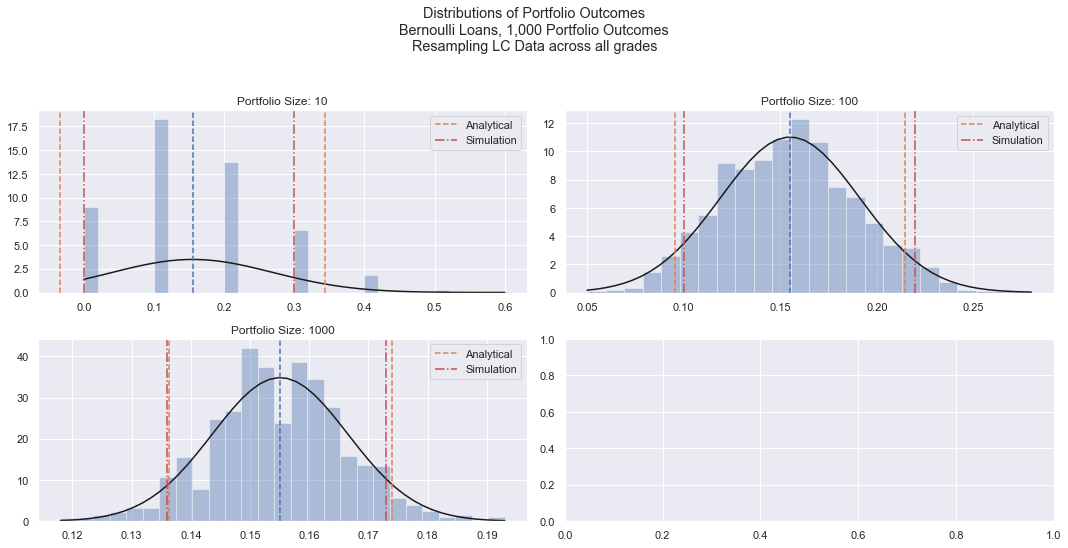

In [61]:
# Summarize and visualize results of bootstrapping
method_desc = f"Resampling LC Data across all grades"
sum_stats = plot_empirical_PD(pop_mean=p_g, emp_data=boot_prop, sample_size=portfolio_size, label_text=method_desc)